In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold #used to split the data into training and testing sets
from sklearn.linear_model import LinearRegression #used to create a linear regression model
from sklearn.metrics import mean_squared_error #used to evaluate the model by comparing the predicted values to the actual values
from sklearn.preprocessing import StandardScaler #used for proper scaling of values like area, bedrooms, bathrooms, stories, parking, etc.


In [12]:
df = pd.read_csv('Housing.csv')

# Check the first few rows of the data
df.head()

features = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
target = ['price']
def get_dumdums(data):
    ob_columns = data.select_dtypes(include=['object']).columns #grabs categorical columns (i.e. ones with text for values which need to be converted numerically)

    for col in ob_columns:
        unique_val = data[col].nunique(dropna=True) # checks if column has 2 unique valeus or not
        if unique_val == 2: #if yes
            dummies = pd.get_dummies(data[col], prefix=col, drop_first=True) # drop the original column and create two new columns 

        else: 
            dummies = pd.get_dummies(data[col], prefix=col) # if there are more than 3 values, then every column gets a value

        dummies = dummies.astype(int)  # Convert dummies to integer type
        # Join the dummy variables to the original dataset
        data = data.join(dummies)
        
        # Drop the original categorical column
        data = data.drop(col, axis=1)

    return data
df_final = get_dumdums(df) 

df_final.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0


In [13]:
df_final['price_per_area'] = df_final['price'] / df_final['area']
df_final['comfort'] = df_final['hotwaterheating_yes'] + df_final['airconditioning_yes']
df_final['bedbathratio'] = df_final['bedrooms'] / df_final['bathrooms']
df_final['hotspot'] = df_final['prefarea_yes'] + df_final['mainroad_yes']
df_final['utilities_score'] = df_final['guestroom_yes'] + df_final['basement_yes']

df_final.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_area,comfort,bedbathratio,hotspot,utilities_score
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0,1792.452830,1,2.0,2,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0,1367.187500,1,1.0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0,1229.919679,0,1.5,2,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0,1628.666667,1,2.0,2,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0,1537.735849,1,4.0,1,2


<Axes: >

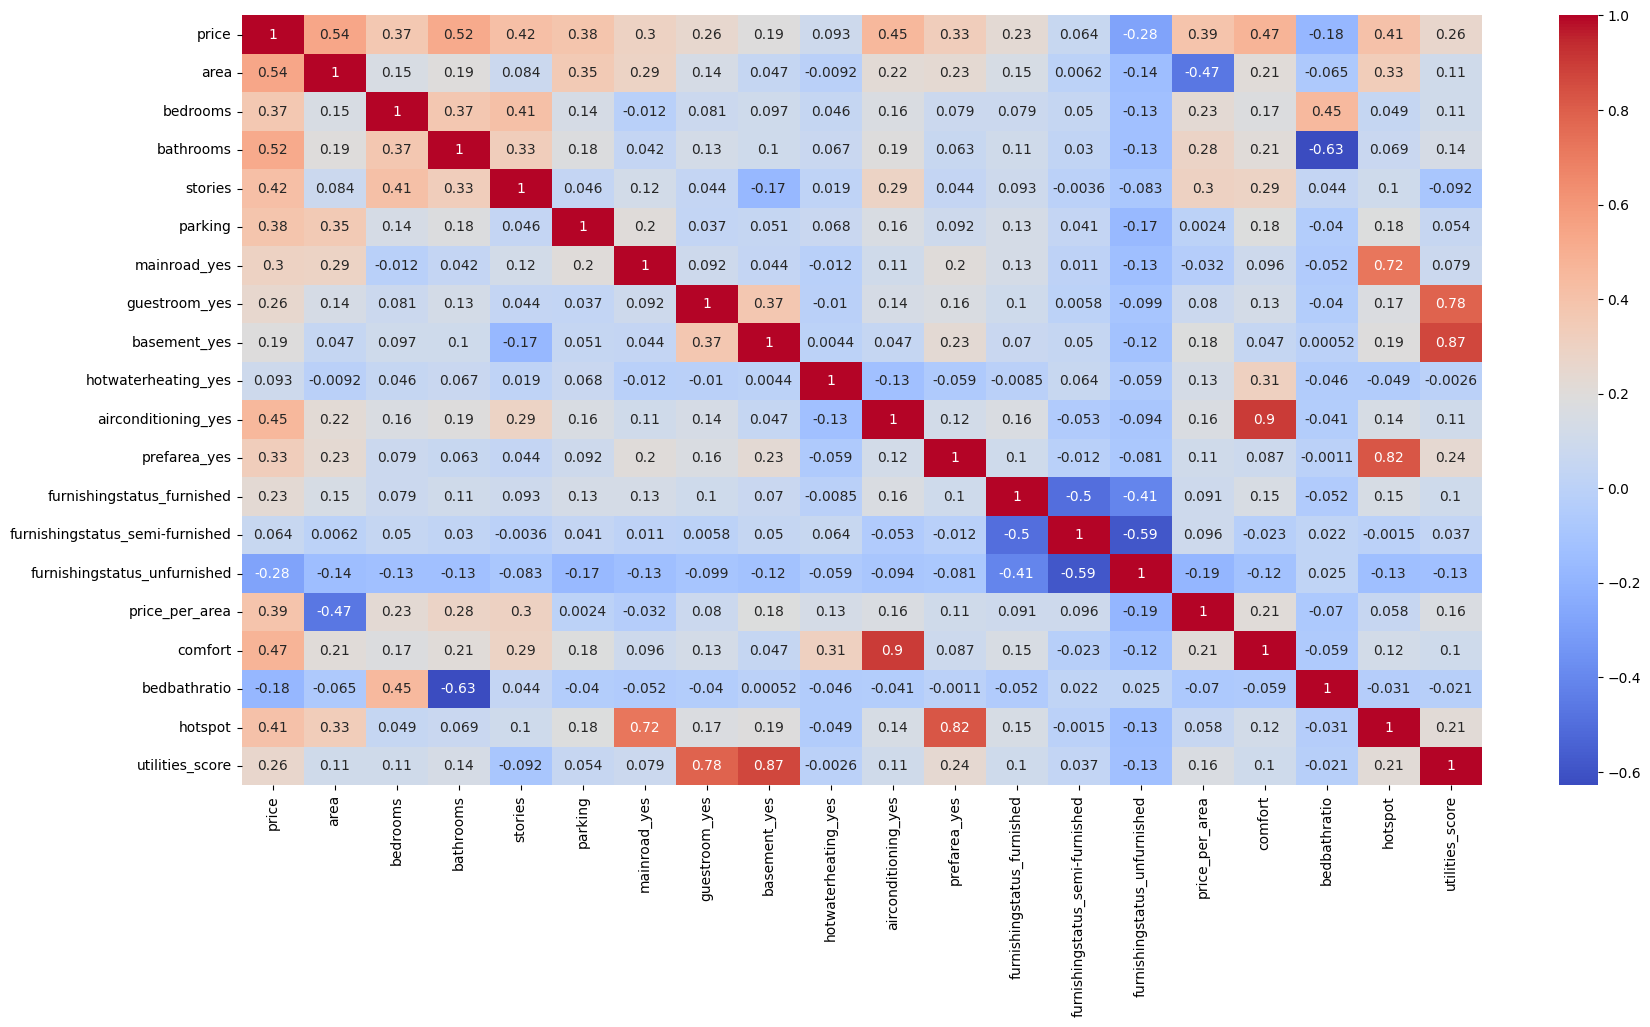

In [4]:
plt.figure(figsize=(20,10))  # Set figure size
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [14]:
df_final.drop(['furnishingstatus_furnished','airconditioning_yes', 'furnishingstatus_semi-furnished','furnishingstatus_unfurnished','prefarea_yes','basement_yes','guestroom_yes','hotwaterheating_yes','bedbathratio','utilities_score'], axis=1, inplace=True)

print(df_final.columns)



Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'price_per_area', 'comfort', 'hotspot'],
      dtype='object')


In [ ]:
target = 'price'
X = df_final.drop(columns=target)
Y = np.log(df_final[target])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #test set is 20% of the data, training set is 80% of the data, random state controls shuffling data before splitting

# import numpy as np

# # Fit a polynomial of degree 2 (quadratic)
# z = np.polyfit(df['area'], df['price'], 2)
# p = np.poly1d(z)

# # Plot original data and the polynomial fit
# plt.scatter(df['area'], df['price'])
# plt.plot(df['area'], p(df['area']), color='red')
# plt.xlabel('Area')
# plt.ylabel('Price')
# plt.show()
